In [17]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path


#Setting a Path

csvpath_sp500 = Path("/Users/andrewcrawford/Desktop/Homework3/sp500_history.csv")
csvpath_goog = Path("/Users/andrewcrawford/Desktop/Homework3/goog_historical.csv")
csvpath_cost = Path("/Users/andrewcrawford/Desktop/Homework3/cost_historical.csv")
csvpath_aapl = Path("/Users/andrewcrawford/Desktop/Homework3/aapl_historical.csv")
csvpath_algo = Path("/Users/andrewcrawford/Desktop/Homework3/algo_returns.csv")
csvpath_whale = Path("/Users/andrewcrawford/Desktop/Homework3/whale_returns.csv")

In [18]:
#Reading CSV files and indexing by column

sp500_df = pd.read_csv(csvpath_sp500, index_col='Date', parse_dates=True, infer_datetime_format=True)
goog_df = pd.read_csv(csvpath_goog, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_df = pd.read_csv(csvpath_cost, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
appl_df = pd.read_csv(csvpath_aapl, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(csvpath_algo, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df = pd.read_csv(csvpath_whale, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [19]:
# Cleaning the csv, dropping nulls

sp500_df.dropna(inplace=True)
goog_df.dropna(inplace=True)
appl_df.dropna(inplace=True)
cost_df.dropna(inplace=True)
algo_df.dropna(inplace=True)
whale_df.dropna(inplace=True)

In [20]:
#Renaming Columns and Dropping unnecessary columns

sp500_df.columns = ['sp500']
goog_rt = goog_df.drop(columns='Symbol')
goog_rt.columns = ['Goog']
appl_rt = appl_df.drop(columns='Symbol')
appl_rt.columns = ['Appl']
cost_rt = cost_df.drop(columns='Symbol')
cost_rt.columns = ['Cost']

In [23]:
# Fix Data Types
sp500_df["sp500"] = sp500_df["sp500"].str.replace("$", "",regex=True)
sp500_df["sp500"] = sp500_df["sp500"].astype("float")
sp500_df.dtypes

sp500    float64
dtype: object

In [25]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()

,sp500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [27]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,sp500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [28]:
# Concatenate all DataFrames into a single DataFrame
portfolio_returns = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

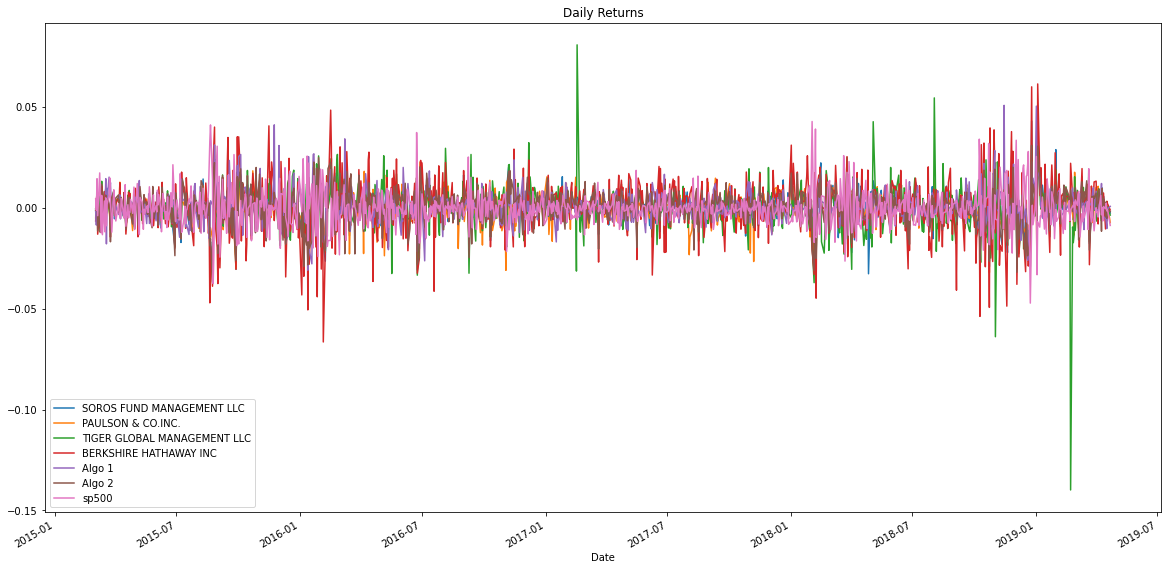

In [69]:
portfolio_returns.plot(figsize=(20,10), title="Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

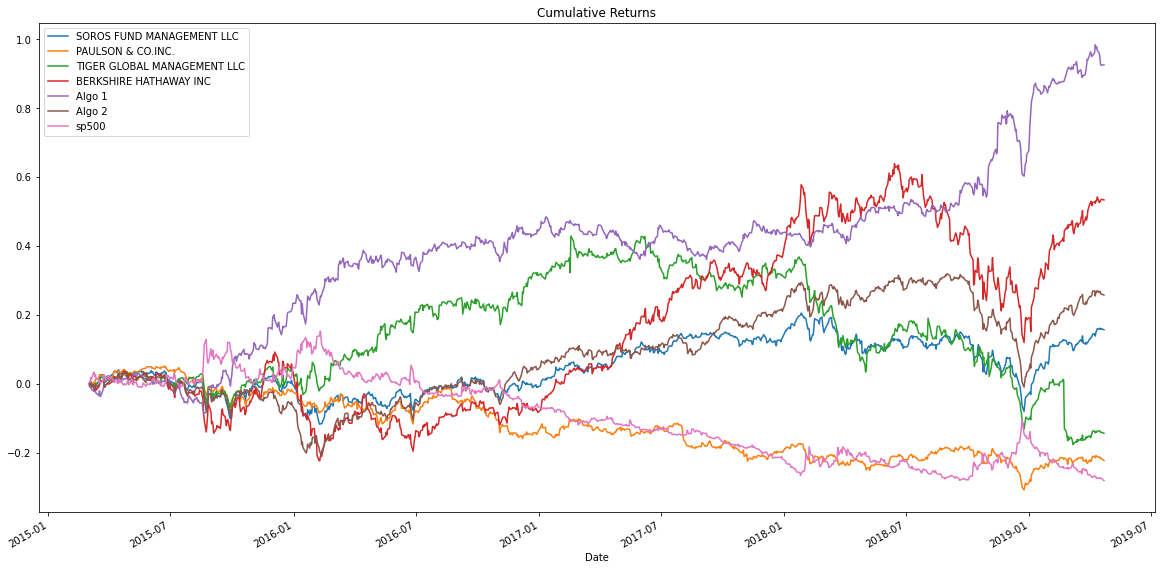

In [30]:
# Plot cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

<AxesSubplot:title={'center':'Portfolio Risk'}>

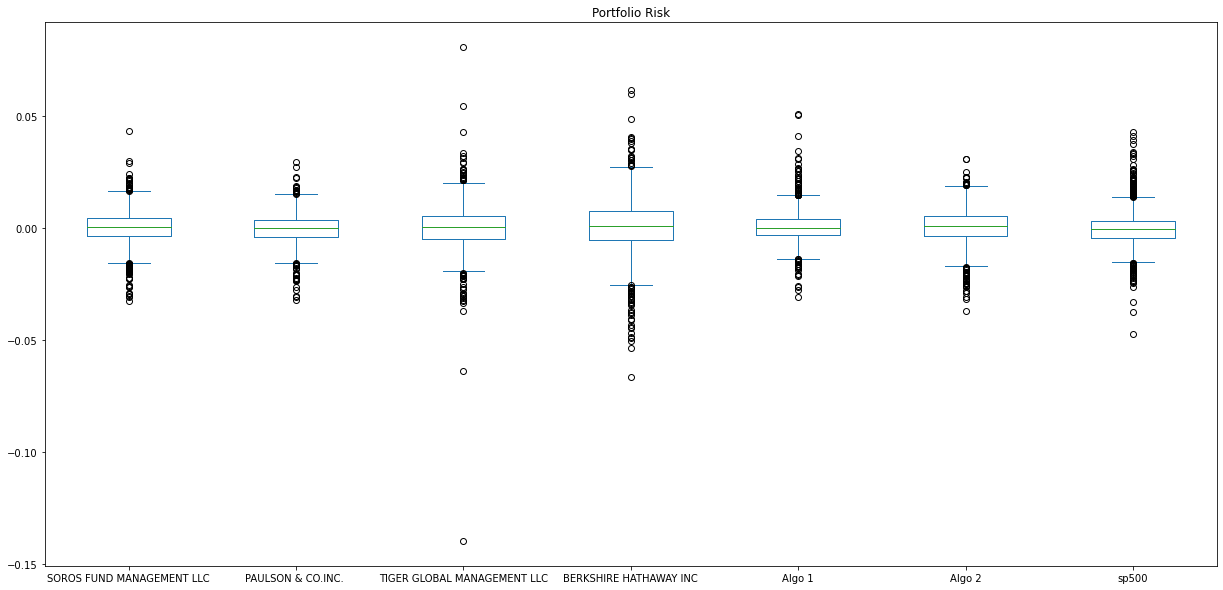

In [32]:
# Box plot to visually show risk
portfolio_returns.plot(kind="box", figsize=(21,10), title="Portfolio Risk")

In [33]:
# Calculate the daily standard deviations of all portfolios
portfolio_risk = portfolio_returns.std()

In [37]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
sp500_risk = portfolio_risk[-1]
portfolio_risk.to_frame()
portfolio_risk.apply(lambda x : True if x> sp500_risk else False)

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

In [36]:
# Calculate the annualized standard deviation (252 trading days)
annual_portfolio_risk = portfolio_returns.std() * np.sqrt (252)
annual_portfolio_risk

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
sp500                          0.136313
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

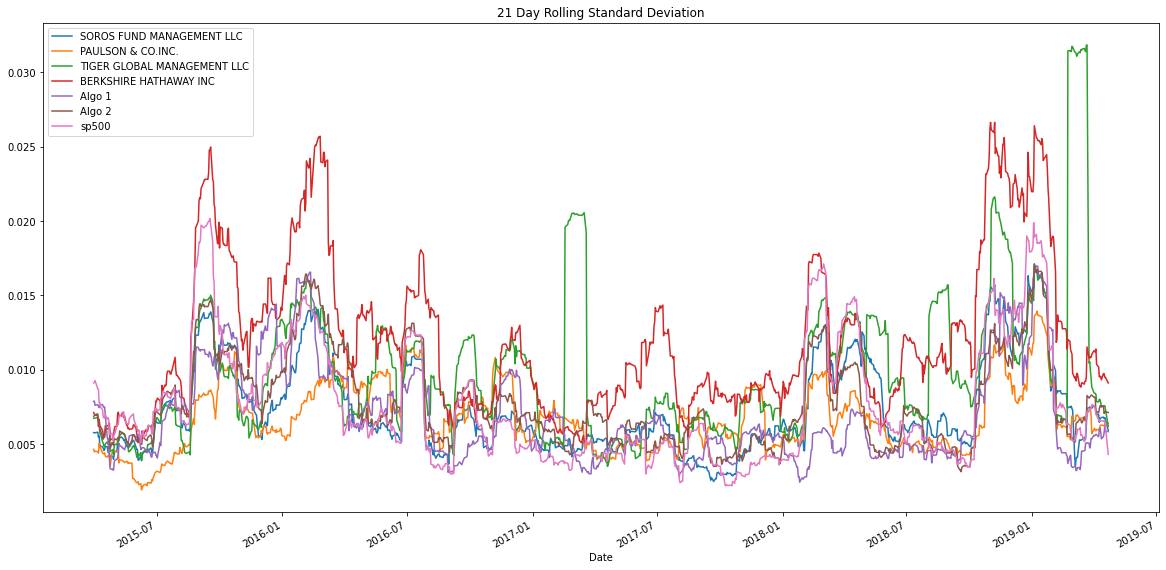

In [39]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [40]:
# Correlation
price_correlation = portfolio_returns.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:title={'center':'Berkshire Hathaway Inc. Beta'}, xlabel='Date'>

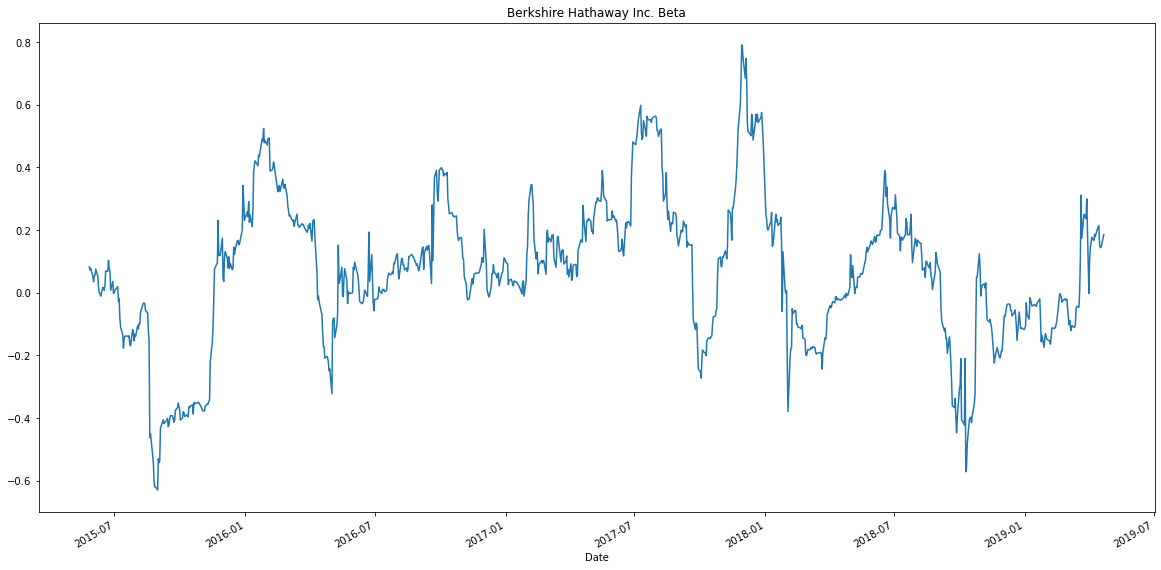

In [41]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = portfolio_returns["BERKSHIRE HATHAWAY INC"].cov(portfolio_returns["sp500"])
covariance
variance = portfolio_returns['sp500'].var()
berkshire_beta = covariance / variance
rolling_covariance = portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Berkshire Hathaway Inc. Beta')

In [42]:
portfolio_returns.ewm(halflife=21)

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0]

In [43]:
# Annualzied Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
sp500                         -0.518582
dtype: float64

<AxesSubplot:>

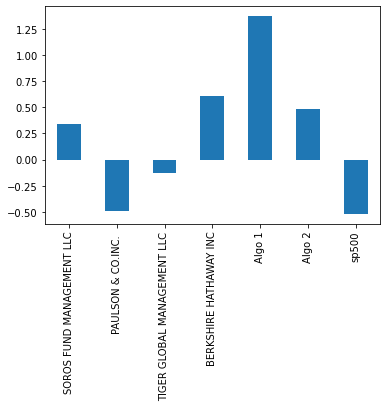

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

In [45]:
stocks_df = pd.concat([appl_df, goog_df, cost_df], axis="rows", join="outer")
stocks_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [46]:
stocks_df.reset_index()

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75
...,...,...,...
745,2018-05-17,COST,199.60
746,2018-05-16,COST,198.71
747,2018-05-15,COST,195.48
748,2018-05-14,COST,195.88


In [47]:
stocks_df = stocks_df.pivot(columns="Symbol", values = "NOCP")
stocks_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [49]:
# Drop Nulls
stocks_returns = stocks_df.pct_change()
stocks_returns.dropna(inplace=True)
stocks_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [53]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
stocks_returns = stocks_returns.dot(weights)
stocks_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [54]:
all_portfolio_returns = pd.concat([portfolio_returns, stocks_returns], axis="columns", join="inner")
x = all_portfolio_returns.columns[-1]
all_portfolio_returns = all_portfolio_returns.rename(columns={x:"Stocks"})
all_portfolio_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'sp500', 'Stocks'],
      dtype='object')

In [55]:
# Only compare dates where the new, custom portfolio has dates
all_portfolio_returns.isnull()
all_portfolio_returns.dropna(axis=0, how="any", inplace=True)
all_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Stocks
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545


In [56]:
# Annual Risk
all_portfolio_risk = all_portfolio_returns.std() * np.sqrt (252)
all_portfolio_risk

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
sp500                          0.152469
Stocks                         0.211627
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

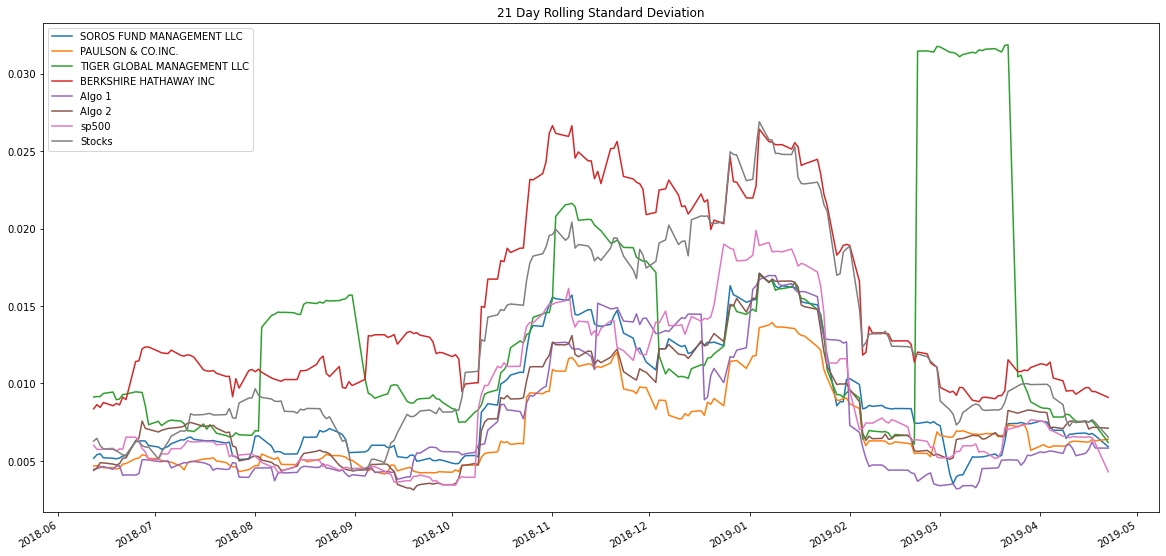

In [57]:
# Rolling
all_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [70]:
#Correlation
all_portfolio_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Stocks
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
sp500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Stocks,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


<AxesSubplot:title={'center':'Portfolio Beta'}>

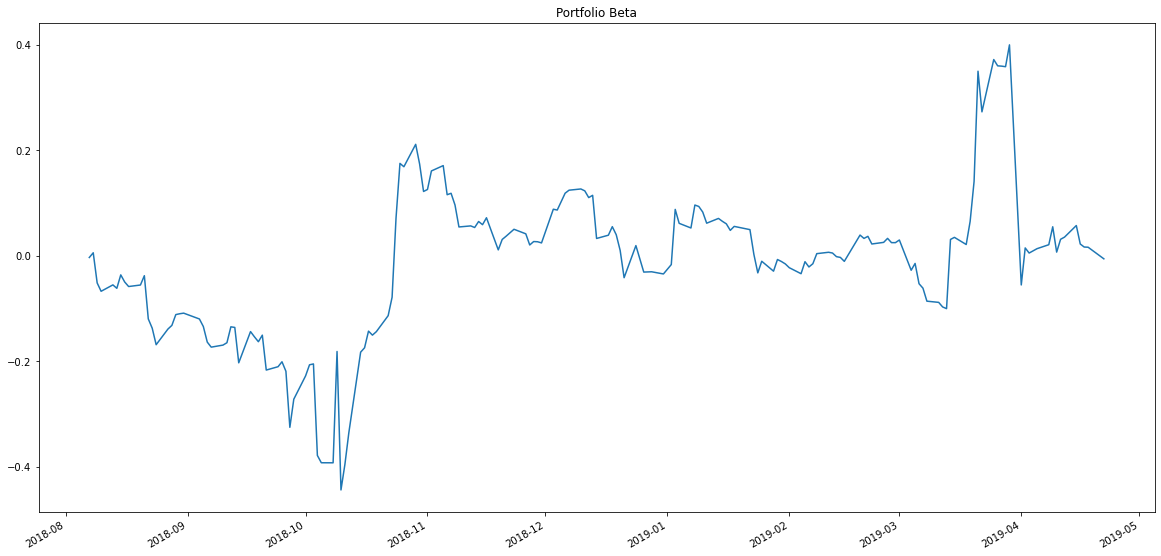

In [63]:
# Beta
covariance_all = all_portfolio_returns['Stocks'].cov(all_portfolio_returns['sp500'])
covariance_all
variance_all = all_portfolio_returns['sp500'].var()
berkshire_beta = covariance / variance
rolling_covariance_all = all_portfolio_returns['Stocks'].rolling(window=60).cov(all_portfolio_returns['sp500'])
rolling_variance_all = all_portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta_all = rolling_covariance_all / rolling_variance_all
rolling_beta_all.plot(figsize=(20, 10), title='Portfolio Beta')

In [65]:
# Annualzied Sharpe Ratios
sharpe_ratios_all = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios_all

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
sp500                         -0.427676
Stocks                         0.876152
dtype: float64

<AxesSubplot:>

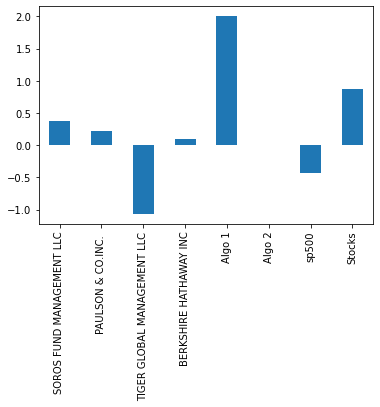

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar")